In [41]:
import torch
device = "mps"
def generate_grid_edges(n, m):
    edges = []
    for i in range(n):
        for j in range(m):
            current = i * m + j
            if i > 0: edges.append((current, (i - 1) * m + j, "north"))
            if i < n - 1: edges.append((current, (i + 1) * m + j, "south"))
            if j < m - 1: edges.append( (current, i * m + (j + 1), "east"))
            if j > 0: edges.append((current, i * m + (j - 1), "west"))# West edge

    return {"edges": edges}

In [ ]:
from core.spatial.energy_graph import PointEnergyMLP
from core.spatial.diffusion import samples, ScheduleLogLinear, training_loop


constraints = {
    "north": [2, 2],
    "south": [2, 2],
    "east":  [2, 2],
    "west":  [2, 2],
    "northeast": [2, 2],
    "northwest": [2, 2],
    "southeast": [2, 2],
    "southwest": [2, 2]
    }

state_path = "outputs/checkpoints/direction_state.pth"

model = PointEnergyMLP(constraints, dim = 2)
model.load_state_dict(torch.load(state_path, map_location = device))


schedule = ScheduleLogLinear(N=200, sigma_min=0.005, sigma_max=10)
#trainer  = training_loop(loader, model, schedule, epochs=000)
#losses   = [ns.loss.item() for ns in trainer]

n, m = (8,2)
cond = generate_grid_edges(n, m)
batchsize = n * m

xt = torch.randn([1,batchsize,2]) 
*xt, x0  = samples(model, schedule.sample_sigmas(200), gam=2, cond = cond, batchsize = batchsize, xt = xt)

print("Solution:")
print(x0[0].cpu().detach().numpy())



/var/folders/ms/qbhhrxd119555wkjspljcjcc0000gn/T/ipykernel_34454/815873200.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(state_path, 

In [ ]:
from domains.spatial.direction_domain import direction_executor
direction_executor.visualize(x0[0].cpu(), "outputs/dir_cons")
import matplotlib.pyplot as plt

SwissLearner

In [3]:
from core.spatial.energy_graph import PointEnergyMLP
from core.spatial.diffusion import samples, ScheduleLogLinear, training_loop, ScheduleDDPM


s_constraints = {
    "online" : [2]
}
model = PointEnergyMLP(s_constraints, dim = 2)
#model.load_state_dict(torch.load("outputs/checkpoints/state.pth", map_location = "cpu"))

from torch.utils.data import Dataset, DataLoader
from datasets.ccsp_dataset import Swissroll, collate_graph_batch
dataset = Swissroll(-10,10,N = 200)
loader = DataLoader(dataset, batch_size = 100, collate_fn = collate_graph_batch)

schedule = ScheduleLogLinear(N=20, sigma_min=0.005, sigma_max=10)
#schedule = ScheduleDDPM(N = 200, beta_start = 0.0001, beta_end = 0.02)
trainer  = training_loop(loader, model, schedule, epochs=200, lr = 0.001)
losses   = [ns.loss.item() for ns in trainer]
import matplotlib.pyplot as plt
plt.plot(losses)

 50%|████▉     | 99/200 [00:59<01:01,  1.65it/s]


RuntimeError: Parent directory checkpoints does not exist.

In [ ]:


import torch
batchsize = 100
cond = {"edges":[(i, "online") for i in range(batchsize)]}
xt = torch.randn([1,batchsize,2]) 
*xt, x0  = samples(model, schedule.sample_sigmas(20), gam=1., cond = cond, batchsize = batchsize, xt = xt)



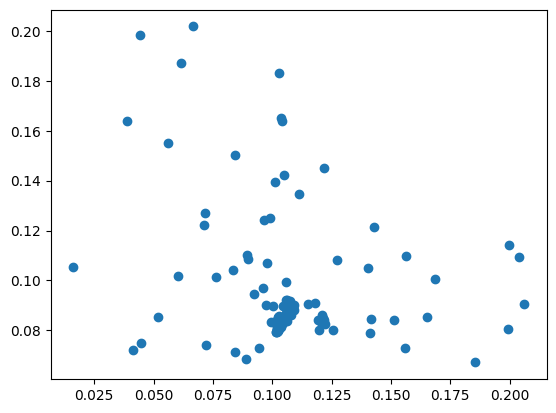

In [ ]:

gene_points = xt[-1][0].cpu().detach()
data_points = dataset.vals[:,0,:]


plt.scatter(gene_points[:,0], gene_points[:,1])
#plt.scatter(data_points[:,0], data_points[:,1])